In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [3]:
pd.options.display.float_format = '{:.3f}'.format

In [4]:
concatenado_unidades = pd.read_parquet('/content/drive/MyDrive/Cópia arquivos Python+TCC/4 BACTÉRIAS SELECIONADAS.parquet')
concatenado_unidades

,Região Geográfica,UF,Município,Date_x,Nome do manancial superficial,Categoria do manancial superficial,Unidade,Resultado,Choveu,Profundidade,...,OD,SolTotais,SolSuspensaoTotais,SolDissolvidosTotais,NitrogenioTotal,NitrogenioAmoniacal,Nitratos,FosforoTotal,Clorofila,Classe
49,SUL,RS,CAMPO BOM,2016-10-11,DOS SINOS,rio,Aphanocapsa sp.,0.000,0.000,0.200,...,10.210,NaN,10.000,36.000,NaN,0.110,NaN,0.062,NaN,0
50,SUL,RS,CAMPO BOM,2016-10-11,DOS SINOS,rio,Aphanocapsa sp.,0.000,0.000,0.200,...,8.400,NaN,10.000,98.000,NaN,0.195,NaN,0.116,NaN,0
78,SUL,RS,SAO LEOPOLDO,2016-10-18,RIO DOS SINOS,rio,Aphanocapsa sp.,17.000,1.000,0.200,...,5.870,NaN,150.000,65.000,NaN,0.862,0.870,0.575,NaN,0
79,SUL,RS,SAO LEOPOLDO,2016-10-18,RIO DOS SINOS,rio,Aphanocapsa sp.,17.000,1.000,0.200,...,5.370,NaN,168.000,81.000,NaN,0.717,0.890,0.769,NaN,0
80,SUL,RS,SAO LEOPOLDO,2016-10-18,RIO DOS SINOS,rio,Aphanocapsa sp.,17.000,1.000,0.200,...,6.710,NaN,156.000,92.000,NaN,0.931,0.880,0.655,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6355,SUDESTE,RJ,RESENDE,2018-12-17,RIO PARAIBA DO SUL,rio,Microcystis sp.,30.000,0.000,0.200,...,7.520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6360,SUDESTE,RJ,RESENDE,2017-06-12,RIO PARAIBA DO SUL,rio,Microcystis sp.,16.000,0.000,0.200,...,7.400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6363,SUDESTE,RJ,RESENDE,2018-12-17,RIO PARAIBA DO SUL,rio,Microcystis sp.,0.000,0.000,0.200,...,7.520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6422,SUDESTE,RJ,RESENDE,2017-06-12,RIO PARAIBA DO SUL,rio,Microcystis sp.,52.000,0.000,0.200,...,7.400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


# Microcystis sp. = 253 classe 1 (4,61%)

## *Início*

In [6]:
df_micro = concatenado_unidades[concatenado_unidades['Unidade']=='Microcystis sp.']
df_micro.describe()

,Resultado,Choveu,Profundidade,TempAr,TempAmostra,pH,Turbidez,CondutividadeEletrica,DBO,OD,SolTotais,SolSuspensaoTotais,SolDissolvidosTotais,NitrogenioTotal,NitrogenioAmoniacal,Nitratos,FosforoTotal,Clorofila,Classe
count,6074.000,4022.000,2704.000,5457.000,5854.000,5788.000,5580.000,1233.000,2691.000,5772.000,2239.000,2492.000,2999.000,1397.000,2548.000,2461.000,2691.000,2156.000,6074.000
mean,2938.272,0.113,0.636,26.979,24.763,7.169,38.883,201.700,3.447,7.293,185.700,67.338,192.978,1.500,0.563,45.029,0.111,10.108,0.042
std,19344.235,0.321,2.459,4.930,5.314,0.943,153.589,2644.360,10.354,5.538,1006.102,790.359,1715.380,2.210,2.603,583.129,0.336,181.435,0.200
min,0.000,0.000,0.000,0.000,0.000,0.000,-0.270,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.200,24.500,22.000,6.727,4.900,46.000,2.000,6.150,57.000,8.261,50.000,1.000,0.100,0.058,0.020,0.801,0.000
50%,0.000,0.000,0.300,27.400,25.200,7.200,12.200,70.200,2.000,7.190,87.000,26.000,64.000,1.000,0.190,0.310,0.040,1.500,0.000
75%,0.000,0.000,0.500,30.000,27.900,7.640,29.500,94.400,3.000,7.990,136.000,50.000,100.000,1.220,0.400,0.870,0.100,3.210,0.000
max,1121388.000,2.000,72.600,42.900,265.000,14.000,8600.000,65680.000,465.000,117.100,31790.000,27720.000,47342.000,32.400,62.200,21450.000,11.000,8339.760,1.000


In [7]:
df_micro['Classe'].value_counts()

,count
Classe,
0,5821
1,253


In [8]:
df_micro.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6074 entries, 41 to 5
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Região Geográfica                   6074 non-null   object 
 1   UF                                  6074 non-null   object 
 2   Município                           6074 non-null   object 
 3   Date_x                              6074 non-null   object 
 4   Nome do manancial superficial       6074 non-null   object 
 5   Categoria do manancial superficial  6074 non-null   object 
 6   Unidade                             6074 non-null   object 
 7   Resultado                           6074 non-null   float64
 8   Choveu                              4022 non-null   float64
 9   Profundidade                        2704 non-null   float64
 10  TempAr                              5457 non-null   float64
 11  TempAmostra                         5854 non-null 

In [9]:
df_micro.head(5)

,Região Geográfica,UF,Município,Date_x,Nome do manancial superficial,Categoria do manancial superficial,Unidade,Resultado,Choveu,Profundidade,...,OD,SolTotais,SolSuspensaoTotais,SolDissolvidosTotais,NitrogenioTotal,NitrogenioAmoniacal,Nitratos,FosforoTotal,Clorofila,Classe
41,SUL,RS,CAMPO BOM,2016-10-11,DOS SINOS,rio,Microcystis sp.,0.000,0.000,0.200,...,10.210,NaN,10.000,36.000,NaN,0.110,NaN,0.062,NaN,0
42,SUL,RS,CAMPO BOM,2016-10-11,DOS SINOS,rio,Microcystis sp.,0.000,0.000,0.200,...,8.400,NaN,10.000,98.000,NaN,0.195,NaN,0.116,NaN,0
76,SUL,RS,SAO LEOPOLDO,2017-05-23,RIO DOS SINOS,rio,Microcystis sp.,228.000,0.000,0.500,...,5.450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
154,SUL,RS,NOVA SANTA RITA,2018-10-20,DOS SINOS,rio,Microcystis sp.,0.000,0.000,0.500,...,7.600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
161,SUL,RS,SANTO ANTONIO DA PATRULHA,2017-04-03,RIO DOS SINOS,rio,Microcystis sp.,0.000,0.000,0.500,...,8.400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [10]:
# ESTAÇÕES DO ANO

# Converte a coluna Date_x para datetime
df_micro['Date_x'] = pd.to_datetime(df_micro['Date_x'])

# Tabela com as datas de início das estações do ano (hemisfério sul)
estacoes_inicio = {
    2014: {'Verao': '2013-12-21', 'Outono': '2014-03-20', 'Inverno': '2014-06-21', 'Primavera': '2014-09-23'},
    2015: {'Verao': '2014-12-21', 'Outono': '2015-03-20', 'Inverno': '2015-06-21', 'Primavera': '2015-09-23'},
    2016: {'Verao': '2015-12-22', 'Outono': '2016-03-20', 'Inverno': '2016-06-20', 'Primavera': '2016-09-22'},
    2017: {'Verao': '2016-12-21', 'Outono': '2017-03-20', 'Inverno': '2017-06-21', 'Primavera': '2017-09-22'},
    2018: {'Verao': '2017-12-21', 'Outono': '2018-03-20', 'Inverno': '2018-06-21', 'Primavera': '2018-09-22'},
    2019: {'Verao': '2018-12-21', 'Outono': '2019-03-20', 'Inverno': '2019-06-21', 'Primavera': '2019-09-23'},
    2020: {'Verao': '2019-12-22', 'Outono': '2020-03-20', 'Inverno': '2020-06-20', 'Primavera': '2020-09-22'},
    2021: {'Verao': '2020-12-21', 'Outono': '2021-03-20', 'Inverno': '2021-06-21', 'Primavera': '2021-09-22'},
    2022: {'Verao': '2021-12-21', 'Outono': '2022-03-20', 'Inverno': '2022-06-21', 'Primavera': '2022-09-23'},
    2023: {'Verao': '2022-12-21', 'Outono': '2023-03-20', 'Inverno': '2023-06-21', 'Primavera': '2023-09-23'}
}

# Função para determinar a estação do ano
def get_season(date):
    year = date.year
    start_dates = estacoes_inicio.get(year, None)
    if not start_dates:
        return None  # Se o ano não estiver na tabela, retorne None

    verao = pd.Timestamp(start_dates['Verao'])
    outono = pd.Timestamp(start_dates['Outono'])
    inverno = pd.Timestamp(start_dates['Inverno'])
    primavera = pd.Timestamp(start_dates['Primavera'])

    if verao <= date < outono:
        return 'Verao'
    elif outono <= date < inverno:
        return 'Outono'
    elif inverno <= date < primavera:
        return 'Inverno'
    else:
        return 'Primavera'

# Aplica a função para criar uma coluna com a estação
df_micro['Estacao'] = df_micro['Date_x'].apply(get_season)

# Cria colunas binárias para cada estação
df_micro['Verao'] = (df_micro['Estacao'] == 'Verao').astype(int)
df_micro['Outono'] = (df_micro['Estacao'] == 'Outono').astype(int)
df_micro['Inverno'] = (df_micro['Estacao'] == 'Inverno').astype(int)
df_micro['Primavera'] = (df_micro['Estacao'] == 'Primavera').astype(int)

# Remove a coluna intermediária de estação, se não for mais necessária
df_micro.drop(columns=['Estacao'], inplace=True)

# Visualizar o resultado
df_micro.head(5)

<ipython-input-10-1bb62865b91d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_micro['Date_x'] = pd.to_datetime(df_micro['Date_x'])
<ipython-input-10-1bb62865b91d>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_micro['Estacao'] = df_micro['Date_x'].apply(get_season)
<ipython-input-10-1bb62865b91d>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

,Região Geográfica,UF,Município,Date_x,Nome do manancial superficial,Categoria do manancial superficial,Unidade,Resultado,Choveu,Profundidade,...,NitrogenioTotal,NitrogenioAmoniacal,Nitratos,FosforoTotal,Clorofila,Classe,Verao,Outono,Inverno,Primavera
41,SUL,RS,CAMPO BOM,2016-10-11,DOS SINOS,rio,Microcystis sp.,0.000,0.000,0.200,...,NaN,0.110,NaN,0.062,NaN,0,0,0,0,1
42,SUL,RS,CAMPO BOM,2016-10-11,DOS SINOS,rio,Microcystis sp.,0.000,0.000,0.200,...,NaN,0.195,NaN,0.116,NaN,0,0,0,0,1
76,SUL,RS,SAO LEOPOLDO,2017-05-23,RIO DOS SINOS,rio,Microcystis sp.,228.000,0.000,0.500,...,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0
154,SUL,RS,NOVA SANTA RITA,2018-10-20,DOS SINOS,rio,Microcystis sp.,0.000,0.000,0.500,...,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1
161,SUL,RS,SANTO ANTONIO DA PATRULHA,2017-04-03,RIO DOS SINOS,rio,Microcystis sp.,0.000,0.000,0.500,...,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0


In [11]:
# DELTA DE TEMPERATURA AR - TEMPERATURA AGUA (DELTA T)

df_micro['Delta T'] = df_micro['TempAr'] - df_micro['TempAmostra']
df_micro['Delta T']

<ipython-input-11-e1a129f0691f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_micro['Delta T'] = df_micro['TempAr'] - df_micro['TempAmostra']


,Delta T
41,8.500
42,5.600
76,3.200
154,5.100
161,1.800
...,...
6355,3.100
6360,5.830
6363,3.100
6422,5.830


In [12]:
df_micro.columns

Index(['Região Geográfica', 'UF', 'Município', 'Date_x',
       'Nome do manancial superficial', 'Categoria do manancial superficial',
       'Unidade', 'Resultado', 'Choveu', 'Profundidade', 'TempAr',
       'TempAmostra', 'pH', 'Turbidez', 'CondutividadeEletrica', 'DBO', 'OD',
       'SolTotais', 'SolSuspensaoTotais', 'SolDissolvidosTotais',
       'NitrogenioTotal', 'NitrogenioAmoniacal', 'Nitratos', 'FosforoTotal',
       'Clorofila', 'Classe', 'Verao', 'Outono', 'Inverno', 'Primavera',
       'Delta T'],
      dtype='object')

In [13]:
features_possiveis_micro = ['Choveu', 'Profundidade', 'TempAr', 'TempAmostra', 'pH', 'Turbidez','CondutividadeEletrica', 'DBO', 'OD', 'SolTotais', 'SolSuspensaoTotais',
                            'SolDissolvidosTotais', 'NitrogenioTotal', 'NitrogenioAmoniacal', 'Nitratos', 'FosforoTotal', 'Clorofila', 'Primavera','Verao',
                            'Outono','Inverno', 'Verao', 'Outono', 'Inverno', 'Primavera','Delta T']
output_micro = 'Classe'

len(features_possiveis_micro)

26

In [14]:
df_micro_c1 = df_micro[df_micro['Classe']==1]
df_micro_c0 = df_micro[df_micro['Classe']==0]

In [15]:
df_micro_c1.describe()

,Date_x,Resultado,Choveu,Profundidade,TempAr,TempAmostra,pH,Turbidez,CondutividadeEletrica,DBO,...,NitrogenioAmoniacal,Nitratos,FosforoTotal,Clorofila,Classe,Verao,Outono,Inverno,Primavera,Delta T
count,253,253.000,69.000,38.000,142.000,198.000,238.000,241.000,16.000,95.000,...,93.000,90.000,95.000,95.000,253.000,253.000,253.000,253.000,253.000,141.000
mean,2019-01-31 04:04:44.584980224,59890.016,0.116,0.316,28.756,26.758,7.200,21.784,4508.588,6.181,...,0.675,0.098,0.112,15.052,1.000,0.601,0.055,0.174,0.170,1.439
min,2016-10-05 00:00:00,20800.000,0.000,0.000,0.200,18.300,2.080,0.100,53.000,0.500,...,0.010,0.020,0.020,0.300,1.000,0.000,0.000,0.000,0.000,-27.690
25%,2018-09-24 00:00:00,42000.000,0.000,0.200,26.900,24.600,6.460,2.730,86.775,2.000,...,0.400,0.020,0.020,1.410,1.000,0.000,0.000,0.000,0.000,0.000
50%,2019-02-08 00:00:00,63360.000,0.000,0.200,29.450,27.150,7.210,9.800,250.350,3.000,...,0.400,0.020,0.030,2.550,1.000,1.000,0.000,0.000,0.000,2.000
75%,2019-02-08 00:00:00,63360.000,0.000,0.300,32.175,29.400,7.670,17.900,635.000,4.000,...,0.400,0.075,0.075,9.073,1.000,1.000,0.000,0.000,0.000,4.500
max,2023-03-22 00:00:00,1121388.000,1.000,4.000,42.800,34.600,14.000,467.000,65680.000,100.000,...,27.700,1.200,1.210,327.000,1.000,1.000,1.000,1.000,1.000,10.600
std,NaN,74322.263,0.323,0.660,6.148,3.269,1.110,55.847,16319.588,11.755,...,2.843,0.220,0.223,48.226,0.000,0.491,0.229,0.380,0.376,5.537


In [16]:
# Calculando a porcentagem de valores nulos em cada coluna
null_percentage = (df_micro_c1.isnull().sum() / len(df_micro_c1)) * 100

# Criando o dataframe com duas colunas: Feature e Porcentagem
df_micro_c1_perc = pd.DataFrame({
    "Feature": df_micro_c1.columns,
    "Porcentagem (%)": null_percentage
}).reset_index(drop=True)

# Formatando a coluna de porcentagem com duas casas decimais
#df_micro_c1_perc["Porcentagem (%)"] = df_micro_c1_perc["Porcentagem (%)"].map("{:.2f}".format)

# Exibindo o dataframe gerado
df_micro_c1_perc.sort_values(by="Porcentagem (%)", ascending=False)

,Feature,Porcentagem (%)
14,CondutividadeEletrica,93.676
9,Profundidade,84.980
8,Choveu,72.727
20,NitrogenioTotal,69.960
22,Nitratos,64.427
21,NitrogenioAmoniacal,63.241
15,DBO,62.451
24,Clorofila,62.451
23,FosforoTotal,62.451
30,Delta T,44.269


In [17]:
# Calculando a porcentagem de valores nulos em cada coluna
null_percentage = (df_micro_c0.isnull().sum() / len(df_micro_c0)) * 100

# Criando o dataframe com duas colunas: Feature e Porcentagem
df_micro_c0_perc = pd.DataFrame({
    "Feature": df_micro_c0.columns,
    "Porcentagem (%)": null_percentage
}).reset_index(drop=True)

# Formatando a coluna de porcentagem com duas casas decimais
#df_micro_c1_perc["Porcentagem (%)"] = df_micro_c1_perc["Porcentagem (%)"].map("{:.2f}".format)

# Exibindo o dataframe gerado
df_micro_c0_perc.sort_values(by="Porcentagem (%)", ascending=False)

,Feature,Porcentagem (%)
14,CondutividadeEletrica,79.093
20,NitrogenioTotal,77.306
17,SolTotais,65.212
24,Clorofila,64.594
18,SolSuspensaoTotais,59.938
22,Nitratos,59.268
21,NitrogenioAmoniacal,57.825
15,DBO,55.403
23,FosforoTotal,55.403
9,Profundidade,54.200


In [18]:
df_micro.columns

Index(['Região Geográfica', 'UF', 'Município', 'Date_x',
       'Nome do manancial superficial', 'Categoria do manancial superficial',
       'Unidade', 'Resultado', 'Choveu', 'Profundidade', 'TempAr',
       'TempAmostra', 'pH', 'Turbidez', 'CondutividadeEletrica', 'DBO', 'OD',
       'SolTotais', 'SolSuspensaoTotais', 'SolDissolvidosTotais',
       'NitrogenioTotal', 'NitrogenioAmoniacal', 'Nitratos', 'FosforoTotal',
       'Clorofila', 'Classe', 'Verao', 'Outono', 'Inverno', 'Primavera',
       'Delta T'],
      dtype='object')

In [19]:
colunas_50_manter = df_micro_c1_perc[df_micro_c1_perc['Porcentagem (%)']<=50]

colunas_50_manter = colunas_50_manter.sort_values(by='Porcentagem (%)', ascending=False)['Feature']
colunas_50_manter.head(22).reset_index(drop=True)

,Feature
0,Delta T
1,TempAr
2,SolSuspensaoTotais
3,SolDissolvidosTotais
4,TempAmostra
5,SolTotais
6,pH
7,Turbidez
8,OD
9,Resultado


In [20]:
df_micro_50 = df_micro[colunas_50_manter.head(22)]
df_micro_50.head(5)

,Delta T,TempAr,SolSuspensaoTotais,SolDissolvidosTotais,TempAmostra,SolTotais,pH,Turbidez,OD,Resultado,...,UF,Nome do manancial superficial,Date_x,Município,Classe,Verao,Outono,Inverno,Primavera,Região Geográfica
41,8.500,21.000,10.000,36.000,12.500,NaN,6.460,57.000,10.210,0.000,...,RS,DOS SINOS,2016-10-11,CAMPO BOM,0,0,0,0,1,SUL
42,5.600,25.900,10.000,98.000,20.300,NaN,7.150,5.000,8.400,0.000,...,RS,DOS SINOS,2016-10-11,CAMPO BOM,0,0,0,0,1,SUL
76,3.200,22.000,NaN,NaN,18.800,NaN,7.620,56.200,5.450,228.000,...,RS,RIO DOS SINOS,2017-05-23,SAO LEOPOLDO,0,0,1,0,0,SUL
154,5.100,27.000,NaN,NaN,21.900,NaN,6.900,26.900,7.600,0.000,...,RS,DOS SINOS,2018-10-20,NOVA SANTA RITA,0,0,0,0,1,SUL
161,1.800,24.000,NaN,NaN,22.200,NaN,7.400,7.600,8.400,0.000,...,RS,RIO DOS SINOS,2017-04-03,SANTO ANTONIO DA PATRULHA,0,0,1,0,0,SUL


In [21]:
df_micro_50.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6074 entries, 41 to 5
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Delta T                             5410 non-null   float64       
 1   TempAr                              5457 non-null   float64       
 2   SolSuspensaoTotais                  2492 non-null   float64       
 3   SolDissolvidosTotais                2999 non-null   float64       
 4   TempAmostra                         5854 non-null   float64       
 5   SolTotais                           2239 non-null   float64       
 6   pH                                  5788 non-null   float64       
 7   Turbidez                            5580 non-null   float64       
 8   OD                                  5772 non-null   float64       
 9   Resultado                           6074 non-null   float64       
 10  Unidade                        

In [22]:
df_micro_50_c1 = df_micro_50[df_micro_50['Classe']==1]
df_micro_50_c0 = df_micro_50[df_micro_50['Classe']==0]

In [23]:
df_micro_50_c1.columns

Index(['Delta T', 'TempAr', 'SolSuspensaoTotais', 'SolDissolvidosTotais',
       'TempAmostra', 'SolTotais', 'pH', 'Turbidez', 'OD', 'Resultado',
       'Unidade', 'Categoria do manancial superficial', 'UF',
       'Nome do manancial superficial', 'Date_x', 'Município', 'Classe',
       'Verao', 'Outono', 'Inverno', 'Primavera', 'Região Geográfica'],
      dtype='object')

In [24]:
df_micro_50_c1.describe()

,Delta T,TempAr,SolSuspensaoTotais,SolDissolvidosTotais,TempAmostra,SolTotais,pH,Turbidez,OD,Resultado,Date_x,Classe,Verao,Outono,Inverno,Primavera
count,141.000,142.000,160.000,166.000,198.000,214.000,238.000,241.000,248.000,253.000,253,253.000,253.000,253.000,253.000,253.000
mean,1.439,28.756,40.237,388.506,26.758,338.483,7.200,21.784,6.055,59890.016,2019-01-31 04:04:44.584980224,1.000,0.601,0.055,0.174,0.170
min,-27.690,0.200,4.000,43.000,18.300,10.000,2.080,0.100,0.330,20800.000,2016-10-05 00:00:00,1.000,0.000,0.000,0.000,0.000
25%,0.000,26.900,10.000,58.000,24.600,60.000,6.460,2.730,4.200,42000.000,2018-09-24 00:00:00,1.000,0.000,0.000,0.000,0.000
50%,2.000,29.450,18.000,74.000,27.150,82.000,7.210,9.800,6.125,63360.000,2019-02-08 00:00:00,1.000,1.000,0.000,0.000,0.000
75%,4.500,32.175,50.000,108.250,29.400,128.000,7.670,17.900,7.535,63360.000,2019-02-08 00:00:00,1.000,1.000,0.000,0.000,0.000
max,10.600,42.800,688.000,31772.000,34.600,31790.000,14.000,467.000,20.300,1121388.000,2023-03-22 00:00:00,1.000,1.000,1.000,1.000,1.000
std,5.537,6.148,77.242,2520.296,3.269,2232.835,1.110,55.847,2.163,74322.263,NaN,0.000,0.491,0.229,0.380,0.376


# **Features inicialmente:**
[
    'CondutividadeEletrica', 'Profundidade', 'Choveu', 'NitrogenioTotal',
    'Nitratos', 'NitrogenioAmoniacal', 'DBO', 'Clorofila', 'FosforoTotal',
    'Delta T', 'TempAr', 'SolSuspensaoTotais', 'SolDissolvidosTotais',
    'TempAmostra', 'SolTotais', 'pH', 'Turbidez', 'OD',
    'Primavera', 'Inverno', 'Outono', 'Verao'
]


# **Features selecionadas:**
['Delta T', 'TempAr', 'SolSuspensaoTotais', 'SolDissolvidosTotais',
'TempAmostra', 'SolTotais', 'pH', 'Turbidez', 'OD',
 'Primavera', 'Inverno', 'Outono', 'Verao']


# **Features excluídas:**
['CondutividadeEletrica', 'Profundidade', 'Choveu', 'NitrogenioTotal', 'Nitratos', 'NitrogenioAmoniacal', 'DBO', 'Clorofila', 'FosforoTotal']

## Imputação dos valores ausentes

In [25]:
from sklearn.ensemble import RandomForestRegressor

columns_with_na = ['Delta T', 'TempAr', 'SolSuspensaoTotais', 'SolDissolvidosTotais', 'TempAmostra', 'SolTotais', 'pH',
                   'Turbidez', 'OD']

# Colunas a serem excluídas durante o treinamento
drop_columns = ['Região Geográfica', 'UF', 'Município', 'Date_x',
                'Nome do manancial superficial', 'Categoria do manancial superficial',
                'Unidade', 'Resultado', 'Classe']

for col in columns_with_na:
    # Dividir os dados em completo e incompleto
    complete_data = df_micro_50_c1[df_micro_50_c1[col].notnull()]
    missing_data = df_micro_50_c1[df_micro_50_c1[col].isnull()]

    # Treinar modelo de Random Forest
    X_train = complete_data.drop(columns=[col] + drop_columns)  # Removendo a coluna atual e as colunas irrelevantes
    y_train = complete_data[col]

    rf_model = RandomForestRegressor(random_state=42)
    rf_model.fit(X_train, y_train)

    # Prever e preencher os valores ausentes
    X_missing = missing_data.drop(columns=[col] + drop_columns)  # Removendo colunas irrelevantes
    predicted_values = rf_model.predict(X_missing)
    df_micro_50_c1.loc[df_micro_50_c1[col].isnull(), col] = predicted_values

In [26]:
df_micro_50_c1.describe()

,Delta T,TempAr,SolSuspensaoTotais,SolDissolvidosTotais,TempAmostra,SolTotais,pH,Turbidez,OD,Resultado,Date_x,Classe,Verao,Outono,Inverno,Primavera
count,253.000,253.000,253.000,253.000,253.000,253.000,253.000,253.000,253.000,253.000,253,253.000,253.000,253.000,253.000,253.000
mean,1.572,28.010,37.505,305.140,26.560,323.201,7.192,21.454,6.071,59890.016,2019-01-31 04:04:44.584980224,1.000,0.601,0.055,0.174,0.170
min,-27.690,0.200,4.000,43.000,18.300,10.000,2.080,0.100,0.330,20800.000,2016-10-05 00:00:00,1.000,0.000,0.000,0.000,0.000
25%,0.691,26.764,10.000,60.573,25.200,62.000,6.490,2.830,4.200,42000.000,2018-09-24 00:00:00,1.000,0.000,0.000,0.000,0.000
50%,2.256,28.188,18.000,86.000,26.149,92.000,7.180,10.005,6.150,63360.000,2019-02-08 00:00:00,1.000,1.000,0.000,0.000,0.000
75%,2.789,30.000,50.000,172.972,28.700,196.000,7.670,17.900,7.470,63360.000,2019-02-08 00:00:00,1.000,1.000,0.000,0.000,0.000
max,10.600,42.800,688.000,31772.000,34.600,31790.000,14.000,467.000,20.300,1121388.000,2023-03-22 00:00:00,1.000,1.000,1.000,1.000,1.000
std,4.189,4.899,70.542,2042.970,2.920,2053.451,1.082,54.532,2.145,74322.263,NaN,0.000,0.491,0.229,0.380,0.376


In [27]:
df_micro_50_c0.describe()

,Delta T,TempAr,SolSuspensaoTotais,SolDissolvidosTotais,TempAmostra,SolTotais,pH,Turbidez,OD,Resultado,Date_x,Classe,Verao,Outono,Inverno,Primavera
count,5269.000,5315.000,2332.000,2833.000,5656.000,2025.000,5550.000,5339.000,5524.000,5821.000,5821,5821.000,5821.000,5821.000,5821.000,5821.000
mean,2.182,26.932,69.198,181.521,24.693,169.554,7.167,39.655,7.349,462.960,2019-06-11 14:55:01.288438528,0.000,0.167,0.233,0.284,0.316
min,-241.700,0.000,0.000,0.000,0.000,0.000,0.000,-0.270,0.000,0.000,2014-02-18 00:00:00,0.000,0.000,0.000,0.000,0.000
25%,0.000,24.420,8.000,50.000,22.000,56.000,6.740,5.000,6.200,0.000,2018-06-13 00:00:00,0.000,0.000,0.000,0.000,0.000
50%,2.100,27.300,27.000,63.000,25.100,87.000,7.195,12.250,7.200,0.000,2019-03-27 00:00:00,0.000,0.000,0.000,0.000,0.000
75%,4.600,30.000,50.000,100.000,27.900,138.000,7.630,30.300,8.000,0.000,2019-12-02 00:00:00,0.000,0.000,0.000,1.000,1.000
max,27.700,42.900,27720.000,47342.000,265.000,31790.000,13.100,8600.000,117.100,19440.000,2023-12-19 00:00:00,0.000,1.000,1.000,1.000,1.000
std,5.035,4.885,816.752,1656.066,5.359,769.332,0.935,156.527,5.636,2040.982,NaN,0.000,0.373,0.423,0.451,0.465


In [28]:
df_micro_50_c0_dropado = df_micro_50_c0.dropna(how='any')
df_micro_50_c0_dropado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1425 entries, 13 to 5936
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Delta T                             1425 non-null   float64       
 1   TempAr                              1425 non-null   float64       
 2   SolSuspensaoTotais                  1425 non-null   float64       
 3   SolDissolvidosTotais                1425 non-null   float64       
 4   TempAmostra                         1425 non-null   float64       
 5   SolTotais                           1425 non-null   float64       
 6   pH                                  1425 non-null   float64       
 7   Turbidez                            1425 non-null   float64       
 8   OD                                  1425 non-null   float64       
 9   Resultado                           1425 non-null   float64       
 10  Unidade                     

Linhas antes da remoção: 1425
Linhas após a remoção de outliers: 1353


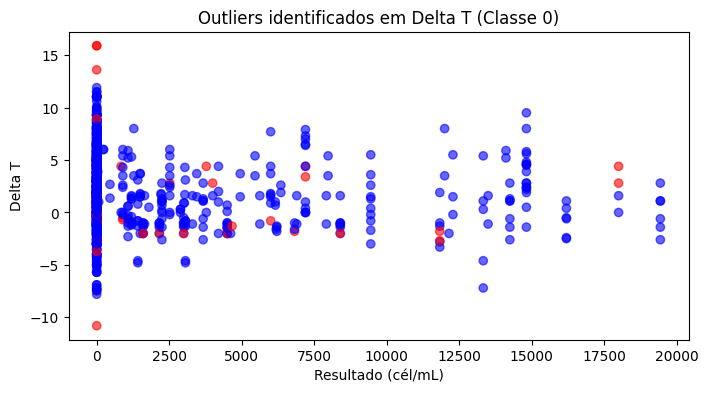

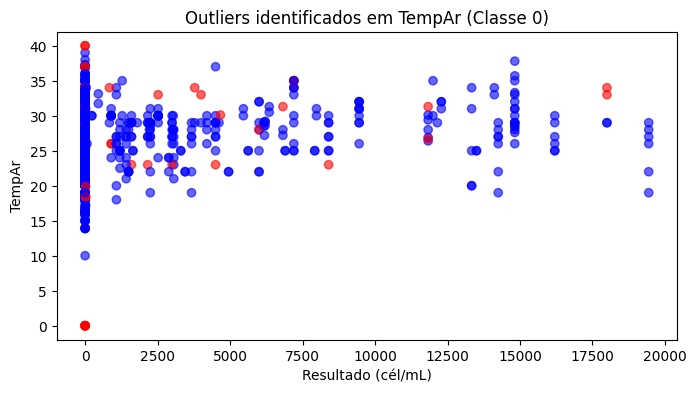

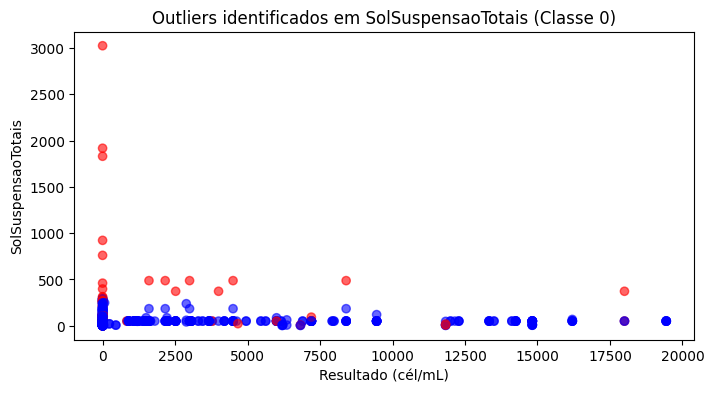

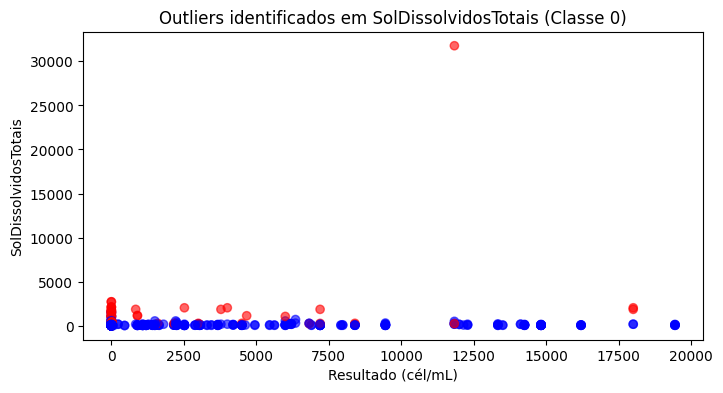

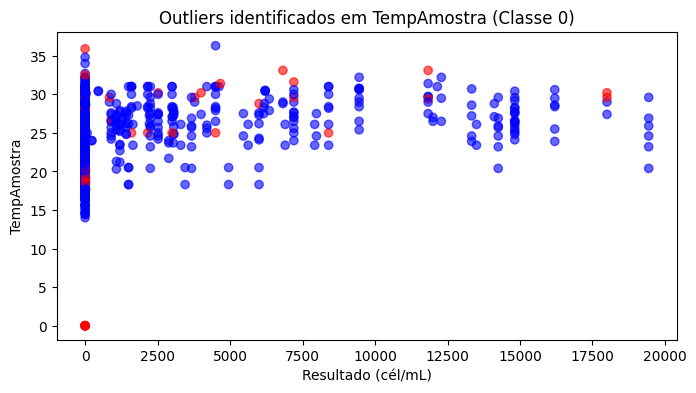

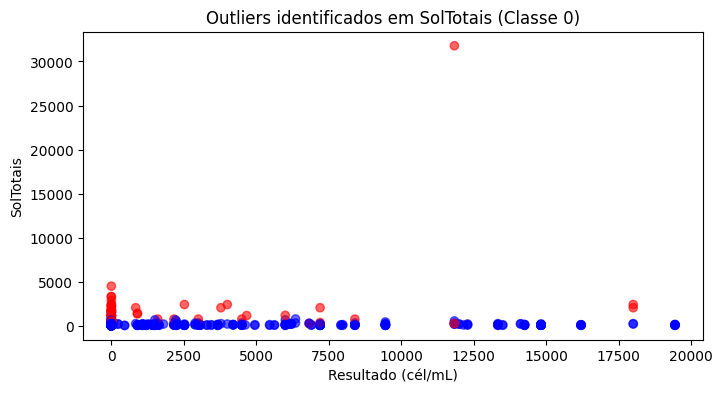

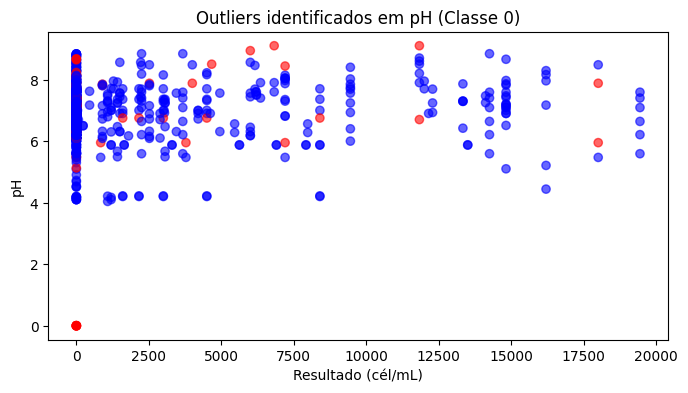

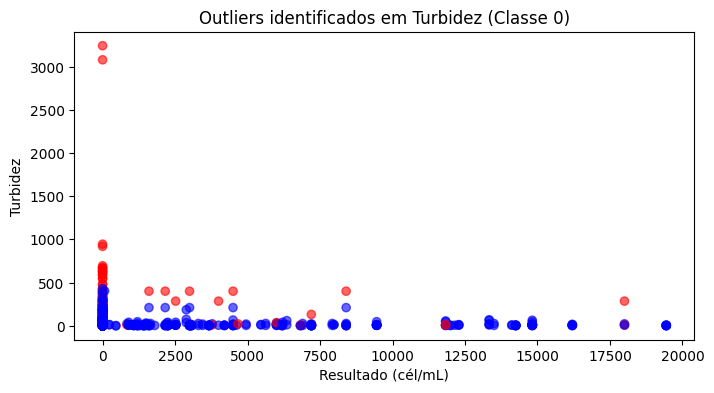

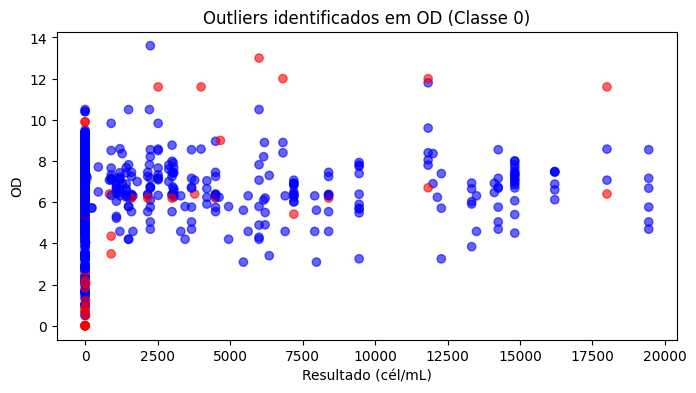

In [30]:
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Filtrar apenas a classe 0
df_class_0 = df_micro_50_c0_dropado[df_micro_50_c0_dropado['Classe'] == 0]

# Selecionar apenas colunas numéricas, excluindo as colunas binárias
exclude_columns = ['Verao', 'Inverno', 'Outono', 'Primavera', 'Classe', 'Resultado','Choveu']
numeric_columns = [col for col in df_class_0.select_dtypes(include=['float64', 'int64']).columns if col not in exclude_columns]

# Configuração do Isolation Forest
isolation_forest = IsolationForest(
    contamination=0.05,  # Proporção de outliers
    random_state=42  # Para reprodutibilidade
)

# Ajustar o modelo aos dados numéricos da classe 0
isolation_forest.fit(df_class_0[numeric_columns])

# Predizer os outliers (-1 = outlier, 1 = normal)
outliers = isolation_forest.predict(df_class_0[numeric_columns])

# Adicionar a classificação de outliers ao dataframe
df_class_0['Outlier'] = outliers

# Filtrar os dados para remover os outliers
df_class_0_cleaned = df_class_0[df_class_0['Outlier'] == 1]

# Exibir resumo
print(f"Linhas antes da remoção: {len(df_class_0)}")
print(f"Linhas após a remoção de outliers: {len(df_class_0_cleaned)}")

# Visualizar outliers para cada coluna numérica (exceto as binárias)
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    plt.scatter(
        df_class_0['Resultado'],
        df_class_0[col],
        c=['red' if outlier == -1 else 'blue' for outlier in df_class_0['Outlier']],
        alpha=0.6
    )
    plt.title(f"Outliers identificados em {col} (Classe 0)")
    plt.ylabel(col)
    plt.xlabel("Resultado (cél/mL)")
    plt.show()

Linhas antes da remoção: 253
Linhas após a remoção de outliers: 241


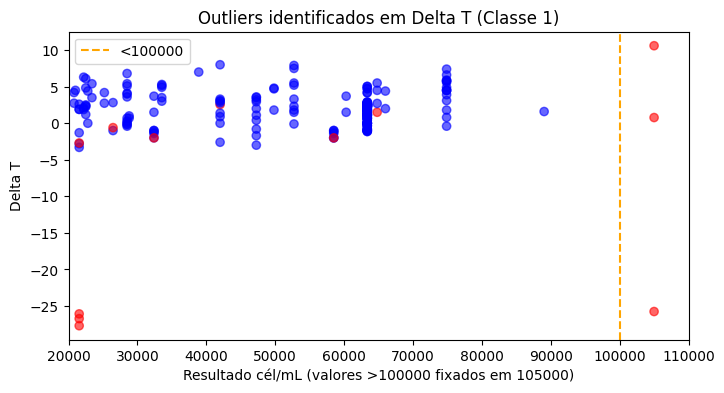

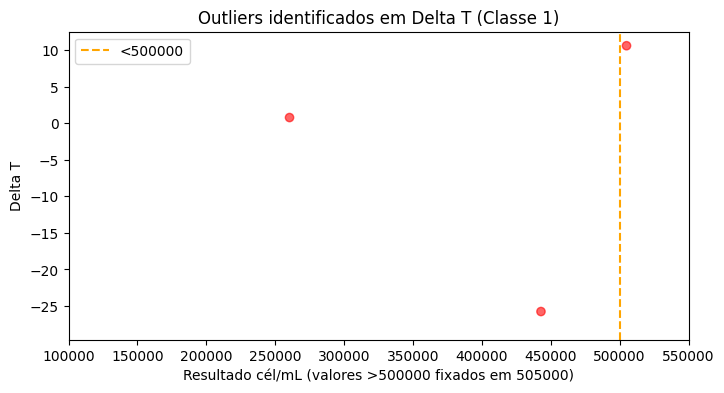

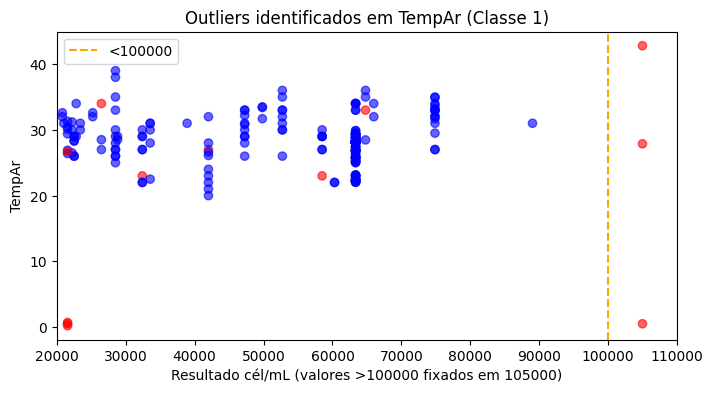

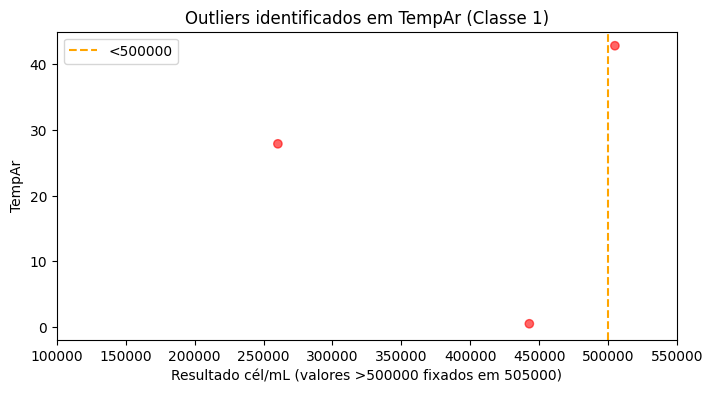

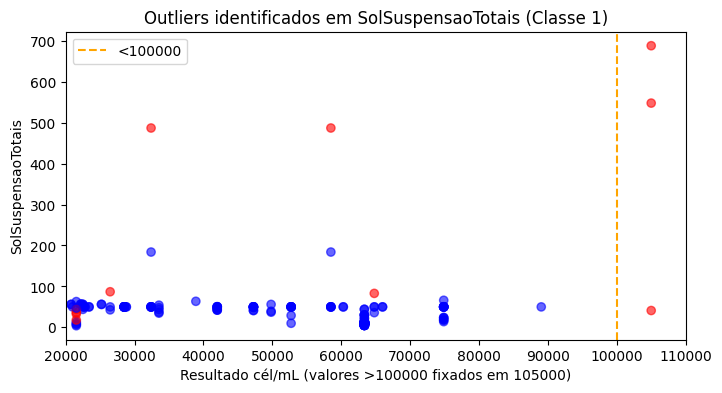

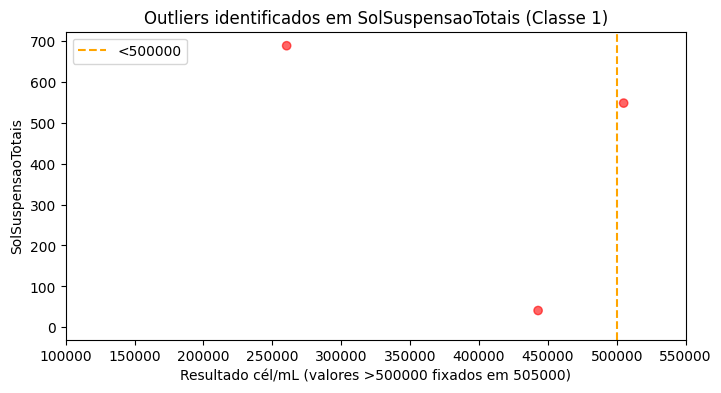

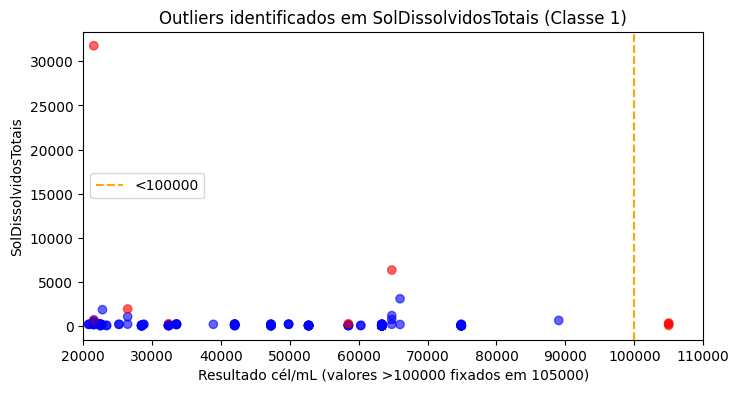

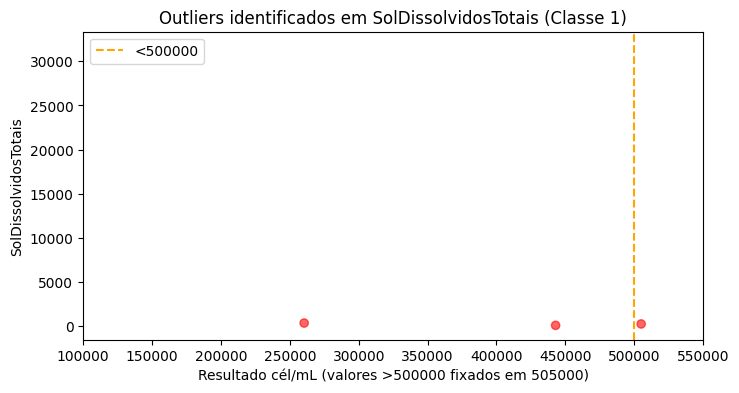

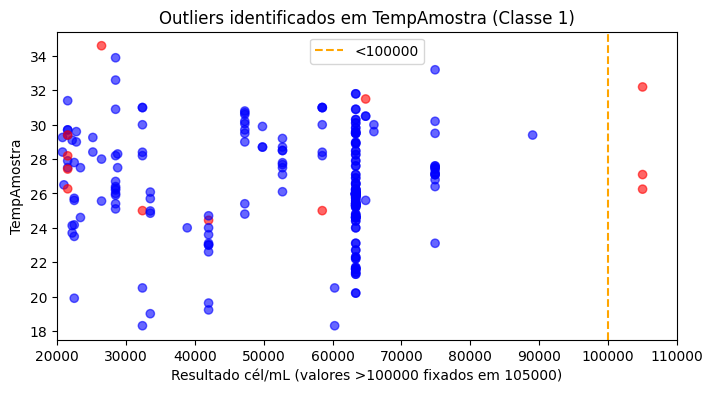

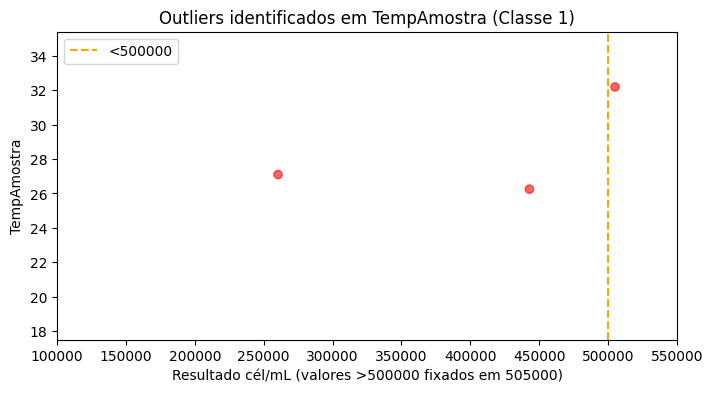

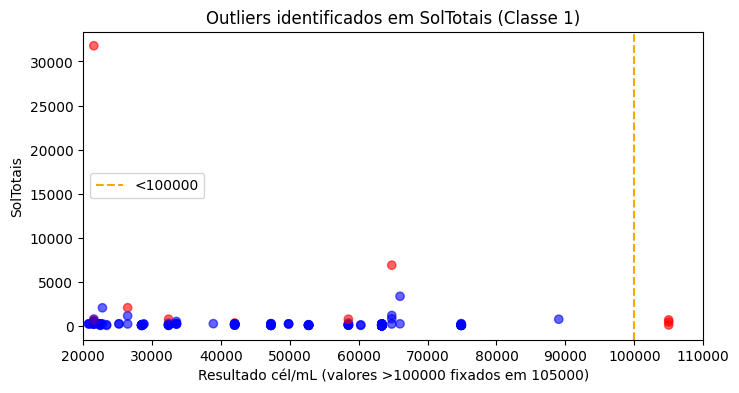

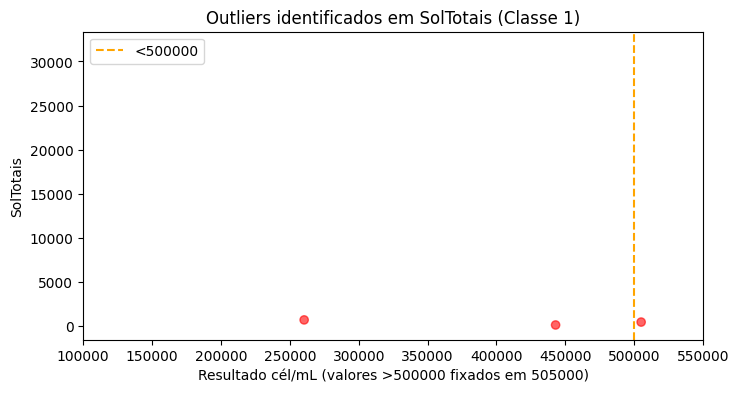

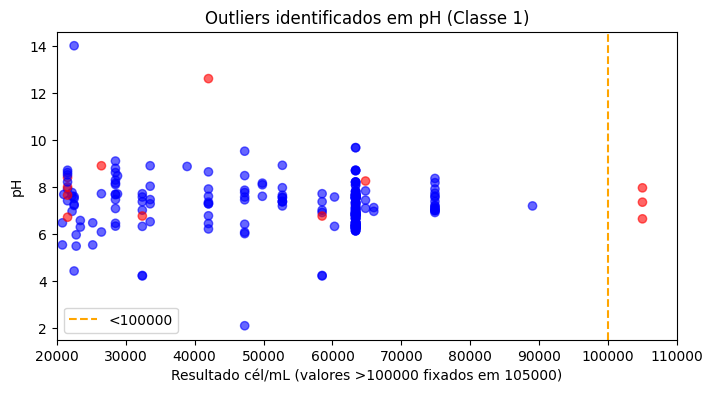

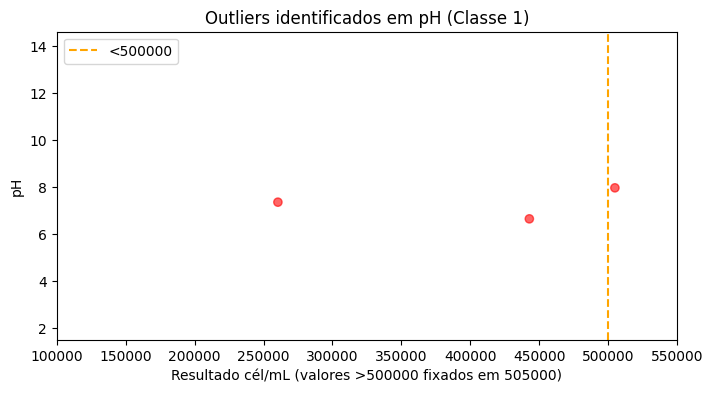

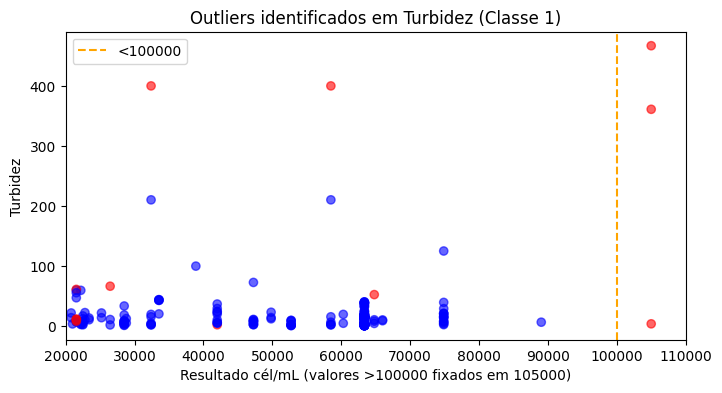

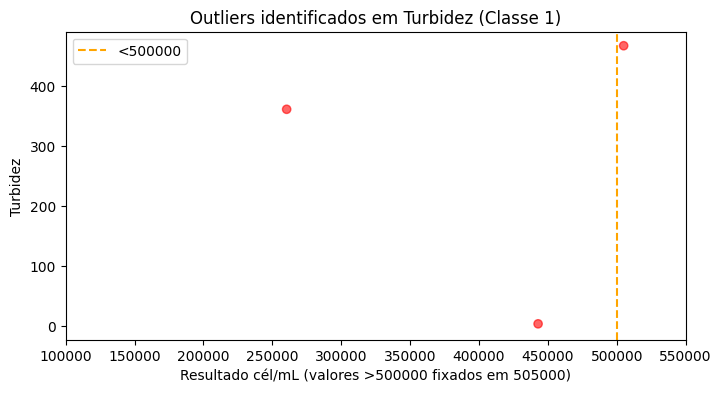

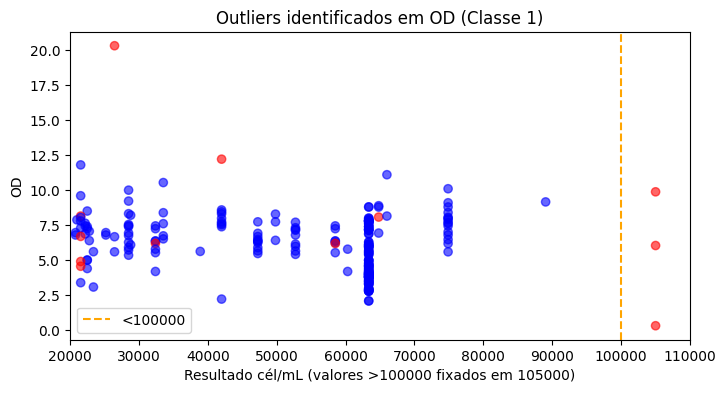

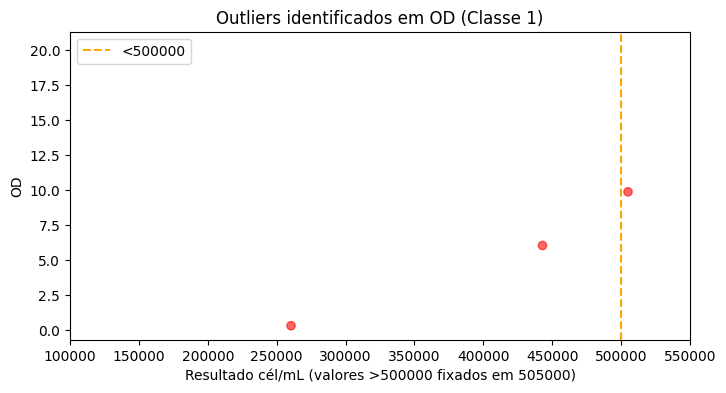

In [31]:
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Filtrar apenas a classe 1
df_class_1 = df_micro_50_c1[df_micro_50_c1['Classe'] == 1]

# Selecionar apenas colunas numéricas, excluindo as colunas irrelevantes
exclude_columns = ['Verao', 'Inverno', 'Outono', 'Primavera', 'Classe', 'Resultado']
numeric_columns = [col for col in df_class_1.select_dtypes(include=['float64', 'int64']).columns if col not in exclude_columns]

# Configuração do Isolation Forest
isolation_forest = IsolationForest(
    contamination=0.05,  # Proporção de outliers
    random_state=42  # Para reprodutibilidade
)

# Ajustar o modelo aos dados numéricos da classe 1
isolation_forest.fit(df_class_1[numeric_columns])

# Predizer os outliers (-1 = outlier, 1 = normal)
outliers = isolation_forest.predict(df_class_1[numeric_columns])

# Adicionar a classificação de outliers ao dataframe
df_class_1['Outlier'] = outliers

# Filtrar os dados para remover os outliers
df_class_1_cleaned = df_class_1[df_class_1['Outlier'] == 1]

# Exibir resumo
print(f"Linhas antes da remoção: {len(df_class_1)}")
print(f"Linhas após a remoção de outliers: {len(df_class_1_cleaned)}")


# Visualizar outliers para cada coluna numérica (exceto as excluídas)
for col in numeric_columns:
    for value_resultado in [[20000, 100000],[100000, 500000]]:
      # Ajustar os valores de "Resultado" para o gráfico
      df_class_1['Resultado Ajustado'] = np.where(
          df_class_1['Resultado'] > value_resultado[1], value_resultado[1]+5000, df_class_1['Resultado']
      )

      plt.figure(figsize=(8, 4))
      plt.scatter(
          df_class_1['Resultado Ajustado'],  # Usar a coluna ajustada
          df_class_1[col],
          c=['red' if outlier == -1 else 'blue' for outlier in df_class_1['Outlier']],
          alpha=0.6
      )
      plt.title(f"Outliers identificados em {col} (Classe 1)")
      plt.ylabel(col)
      plt.xlim(value_resultado[0], value_resultado[1]+10000 if value_resultado[1]==100000 else value_resultado[1]+50000)
      plt.xlabel(f"Resultado cél/mL (valores >{value_resultado[1]} fixados em {value_resultado[1]+5000})")
      plt.axvline(value_resultado[1], color='orange', linestyle='--', label=f'<{value_resultado[1]}')  # Linha de referência
      plt.legend()
      plt.show()

In [32]:
  df_class_0_cleaned.describe()

,Delta T,TempAr,SolSuspensaoTotais,SolDissolvidosTotais,TempAmostra,SolTotais,pH,Turbidez,OD,Resultado,Date_x,Classe,Verao,Outono,Inverno,Primavera,Outlier
count,1353.000,1353.000,1353.000,1353.000,1353.000,1353.000,1353.000,1353.000,1353.000,1353.000,1353,1353.000,1353.000,1353.000,1353.000,1353.000,1353.000
mean,2.106,27.197,40.660,84.746,25.091,109.150,6.923,26.953,6.869,1158.744,2019-03-01 00:17:01.729489920,0.000,0.123,0.211,0.325,0.341,1.000
min,-7.800,10.000,2.000,6.790,14.000,11.000,4.040,0.001,0.500,0.000,2016-08-01 00:00:00,0.000,0.000,0.000,0.000,0.000,1.000
25%,-0.200,25.000,11.000,50.000,23.200,54.000,6.440,4.500,6.270,0.000,2018-06-19 00:00:00,0.000,0.000,0.000,0.000,0.000,1.000
50%,1.800,27.600,50.000,62.000,25.400,80.000,6.970,8.600,7.120,0.000,2018-11-17 00:00:00,0.000,0.000,0.000,0.000,0.000,1.000
75%,4.400,30.000,50.000,86.000,27.400,116.000,7.400,18.900,7.800,0.000,2019-09-24 00:00:00,0.000,0.000,0.000,1.000,1.000,1.000
max,11.900,39.000,292.000,1542.000,36.300,1534.000,8.840,428.000,13.600,19440.000,2022-12-13 00:00:00,0.000,1.000,1.000,1.000,1.000,1.000
std,3.232,4.164,39.503,101.994,3.381,113.602,0.775,56.299,1.508,3336.720,NaN,0.000,0.328,0.408,0.469,0.474,0.000


In [33]:
df_class_1_cleaned.describe()

,Delta T,TempAr,SolSuspensaoTotais,SolDissolvidosTotais,TempAmostra,SolTotais,pH,Turbidez,OD,Resultado,Date_x,Classe,Verao,Outono,Inverno,Primavera,Outlier
count,241.000,241.000,241.000,241.000,241.000,241.000,241.000,241.000,241.000,241.000,241,241.000,241.000,241.000,241.000,241.000,241.000
mean,2.057,28.412,28.586,142.669,26.482,152.238,7.152,14.885,5.985,54013.012,2019-02-10 10:15:26.141078784,1.000,0.622,0.054,0.174,0.149,1.000
min,-3.300,20.000,4.000,43.000,18.300,10.000,2.080,0.100,2.100,20800.000,2016-10-05 00:00:00,1.000,0.000,0.000,0.000,0.000,1.000
25%,0.700,26.900,10.000,60.000,25.200,62.000,6.460,2.790,4.200,42000.000,2018-10-17 00:00:00,1.000,0.000,0.000,0.000,0.000,1.000
50%,2.295,28.196,13.080,86.000,26.067,91.000,7.160,10.000,6.150,63360.000,2019-02-08 00:00:00,1.000,1.000,0.000,0.000,0.000,1.000
75%,2.900,30.000,50.000,154.000,28.500,162.000,7.650,16.000,7.450,63360.000,2019-02-08 00:00:00,1.000,1.000,0.000,0.000,0.000,1.000
max,8.000,39.000,184.000,3100.000,33.900,3350.000,14.000,210.000,11.800,89040.000,2023-03-22 00:00:00,1.000,1.000,1.000,1.000,1.000,1.000
std,2.109,3.319,24.328,256.855,2.890,278.834,1.036,23.538,1.890,16058.854,NaN,0.000,0.486,0.226,0.380,0.357,0.000


In [34]:
df_micro_0e1 = pd.concat([df_class_0_cleaned,df_class_1_cleaned])
df_micro_0e1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1594 entries, 13 to 3248
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Delta T                             1594 non-null   float64       
 1   TempAr                              1594 non-null   float64       
 2   SolSuspensaoTotais                  1594 non-null   float64       
 3   SolDissolvidosTotais                1594 non-null   float64       
 4   TempAmostra                         1594 non-null   float64       
 5   SolTotais                           1594 non-null   float64       
 6   pH                                  1594 non-null   float64       
 7   Turbidez                            1594 non-null   float64       
 8   OD                                  1594 non-null   float64       
 9   Resultado                           1594 non-null   float64       
 10  Unidade                     

In [35]:
df_micro_0e1.to_csv('/content/drive/MyDrive/RESULTADOS MERGE 2/REMOVENDO NaN C0 E 50% RFRegressor VALORES C1 (ELIMINANDO OUTLIERS COM ISOLATION FOREST)/MICROCYSTIS sp./Cópia de DF-BASE_microcystis.csv', index=False)